<a href="https://colab.research.google.com/github/ravijainpro/Data-Science-Lab/blob/master/28_01_20/1_Linear_Regression_with_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def generate_dataset():
 x_batch = np.linspace(0, 2, 100)
 y_batch = 1.5 * x_batch + np.random.randn(*x_batch.shape) * 0.2 + 0.5
 return x_batch, y_batch

In [0]:
def linear_regression():
  x = tf.placeholder(tf.float32, shape=(None, ), name='x')
  y = tf.placeholder(tf.float32, shape=(None, ), name='y')

  with tf.variable_scope('lreg') as scope:
    w = tf.Variable(np.random.normal(), name='W')
    b = tf.Variable(np.random.normal(), name='b')
		
    y_pred = tf.add(tf.multiply(w, x), b)

    loss = tf.reduce_mean(tf.square(y_pred - y))

  return x, y, y_pred, loss

0 loss: 0.04606501
1 loss: 0.04002173
2 loss: 0.037918378
3 loss: 0.03707588
4 loss: 0.036643967
5 loss: 0.03635235
6 loss: 0.036114704
7 loss: 0.035903066
8 loss: 0.03570803
9 loss: 0.0355261
10 loss: 0.0353557
11 loss: 0.035195857
12 loss: 0.03504585
13 loss: 0.034905046
14 loss: 0.034772884
15 loss: 0.034648813
16 loss: 0.034532353
17 loss: 0.034423042
18 loss: 0.034320425
19 loss: 0.034224097
20 loss: 0.03413368
21 loss: 0.034048803
22 loss: 0.03396913
23 loss: 0.033894338
24 loss: 0.033824127
25 loss: 0.03375823
26 loss: 0.03369637
27 loss: 0.033638302
28 loss: 0.03358379
29 loss: 0.03353262
Predicting


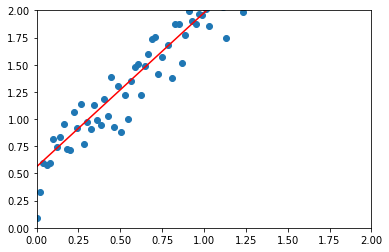

In [11]:
def run():
  x_batch, y_batch = generate_dataset()
  x, y, y_pred, loss = linear_regression()

  optimizer = tf.train.GradientDescentOptimizer(0.1)
  train_op = optimizer.minimize(loss)

  with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    feed_dict = {x: x_batch, y: y_batch}
		
    for i in range(30):
      session.run(train_op, feed_dict)
      print(i, "loss:", loss.eval(feed_dict))

    print('Predicting')
    y_pred_batch = session.run(y_pred, {x : x_batch})

  plt.scatter(x_batch, y_batch)
  plt.plot(x_batch, y_pred_batch, color='red')
  plt.xlim(0, 2)
  plt.ylim(0, 2)
  plt.savefig('plot.png')

if __name__ == "__main__":
  run()